# Spark Funds Investment Analysis

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
import chardet
# Set plot style for better visualizations
sns.set()
sns.set_palette("deep")

# Explanation:
# We're importing the necessary libraries for our analysis. Pandas and NumPy will be used for data manipulation,
# while Matplotlib and Seaborn will be used for creating visualizations. We're also setting a plot style
# to make our visualizations more appealing and consistent.

## Data Cleaning 1: Load the data, understand the dataset, and merge the data frames

In [ ]:
def read_csv_with_encoding(file_path, **kwargs):
    encodings = ['utf-8', 'ISO-8859-1', 'cp1252', 'Windows-1254']
    
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding, **kwargs)
        except UnicodeDecodeError:
            continue
    
    # If all encodings fail, try to detect the encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)['encoding']
    
    try:
        return pd.read_csv(file_path, encoding=detected_encoding, **kwargs)
    except Exception as e:
        print(f"Error reading file with detected encoding {detected_encoding}: {str(e)}")
        raise

In [17]:
# Load the datasets
companies = read_csv_with_encoding('companies.txt', sep='\t')
rounds = read_csv_with_encoding('rounds2.csv')
mapping = read_csv_with_encoding('mapping.csv')

# Display dataset shapes
print("Dataset shapes:")
print(f"Companies: {companies.shape}")
print(f"Rounds: {rounds.shape}")
print(f"Mapping: {mapping.shape}")

# Display the first few rows of each dataset
print("\nFirst few rows of companies dataset:")
print(companies.head())
print("\nFirst few rows of rounds dataset:")
print(rounds.head())
print("\nFirst few rows of mapping dataset:")
print(mapping.head())

# Check for missing values
print("\nMissing values in companies dataset:")
print(companies.isnull().sum())
print("\nMissing values in rounds dataset:")
print(rounds.isnull().sum())
print("\nMissing values in mapping dataset:")
print(mapping.isnull().sum())

# Merge the datasets
df = pd.merge(rounds, companies, left_on='company_permalink', right_on='permalink', how='left')
df = pd.merge(df, mapping, on='category_list', how='left')

print("\nMerged dataframe shape:", df.shape)
print("\nColumns in the merged dataframe:")
print(df.columns)

# Explanation:
# 1. We load the three datasets: companies, rounds, and mapping.
# 2. We display the shape of each dataset to understand their size.
# 3. We show the first few rows of each dataset to get an idea of their structure.
# 4. We check for missing values in each dataset to identify potential data quality issues.
# 5. We merge the datasets based on common columns:
#    - First, we merge rounds and companies on 'company_permalink' and 'permalink'
#    - Then, we merge the result with mapping on 'category_list'
# 6. Finally, we display the shape and columns of the merged dataframe.

Dataset shapes:
Companies: (66368, 10)
Rounds: (114949, 6)
Mapping: (688, 10)

First few rows of companies dataset:
                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2     

## Funding Type Analysis: Analyze different funding types and choose the most suitable one for Spark Funds

Funding Type Analysis:
             funding_type  count  total_amount  average_amount
13                venture  55494  5.901262e+11    1.174895e+07
11                   seed  30524  1.698986e+10    7.198180e+05
2          debt_financing   6895  1.138848e+11    1.704353e+07
0                   angel   6094  4.659255e+09    9.586945e+05
12            undisclosed   4897  3.044143e+10    1.924237e+07
3     equity_crowdfunding   3257  6.611162e+08    5.383682e+05
8          private_equity   2285  1.419254e+11    7.330859e+07
4                   grant   2200  9.134424e+09    4.300576e+06
1        convertible_note   1817  2.103126e+09    1.453439e+06
7         post_ipo_equity    638  5.161061e+10    8.218249e+07
9    product_crowdfunding    410  5.261686e+08    1.363131e+06
5   non_equity_assistance    191  3.001782e+07    4.112031e+05
6           post_ipo_debt    152  2.564309e+10    1.687046e+08
10       secondary_market     95  2.389489e+09    7.964963e+07


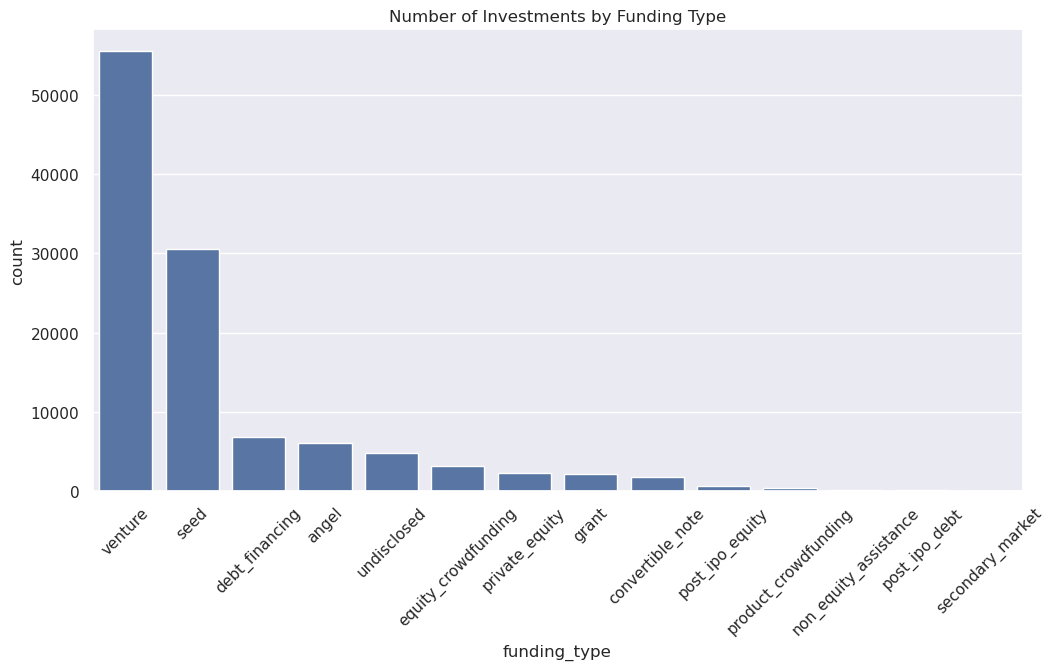


Chosen funding type for analysis: venture


In [18]:
# Convert funding amounts to USD
df['raised_amount_usd'] = pd.to_numeric(df['raised_amount_usd'], errors='coerce')

# Analyze funding types
funding_type_analysis = df.groupby('funding_round_type').agg({
    'funding_round_type': 'count',
    'raised_amount_usd': ['sum', 'mean']
}).reset_index()
funding_type_analysis.columns = ['funding_type', 'count', 'total_amount', 'average_amount']
funding_type_analysis = funding_type_analysis.sort_values('count', ascending=False)

print("Funding Type Analysis:")
print(funding_type_analysis)

# Visualize funding types
plt.figure(figsize=(12, 6))
sns.barplot(x='funding_type', y='count', data=funding_type_analysis)
plt.title('Number of Investments by Funding Type')
plt.xticks(rotation=45)
plt.show()

# Choose the most suitable funding type (e.g., venture)
chosen_funding_type = 'venture'
print(f"\nChosen funding type for analysis: {chosen_funding_type}")

# Explanation:
# 1. We convert the 'raised_amount_usd' to numeric, handling any errors by setting them to NaN.
# 2. We group the data by funding round type and calculate:
#    - Count of each funding type
#    - Total amount raised for each funding type
#    - Average amount raised for each funding type
# 3. We reset the index and rename columns for clarity.
# 4. We sort the funding types by count in descending order.
# 5. We create a bar plot to visualize the number of investments by funding type.
# 6. We choose 'venture' as the funding type for further analysis, but this can be adjusted based on the results.

## Country Analysis: Identify the top nine countries with the highest total funding and the top three English-speaking countries among them

In [19]:
# Filter data for the chosen funding type
df_filtered = df[df['funding_round_type'] == chosen_funding_type]

# Analyze countries
country_analysis = df_filtered.groupby('country_code').agg({
    'raised_amount_usd': 'sum'
}).reset_index().sort_values('raised_amount_usd', ascending=False)

print("Top 9 countries by total funding:")
print(country_analysis.head(9))

# List of English-speaking countries (you may need to expand this list)
english_speaking_countries = ['USA', 'GBR', 'CAN', 'AUS', 'NZL', 'IRL']

top_english_speaking = country_analysis[country_analysis['country_code'].isin(english_speaking_countries)].head(3)

print("\nTop 3 English-speaking countries:")
print(top_english_speaking)

# Explanation:
# 1. We filter the dataframe to include only the chosen funding type (venture).
# 2. We group the data by country code and sum the total funding for each country.
# 3. We sort the countries by total funding in descending order and display the top 9.
# 4. We define a list of English-speaking countries (this list can be expanded if needed).
# 5. We filter the country analysis to include only English-speaking countries and display the top 3.
# This analysis helps identify the most promising countries for investment, focusing on English-speaking ones.

Top 9 countries by total funding:
Empty DataFrame
Columns: [country_code, raised_amount_usd]
Index: []

Top 3 English-speaking countries:
Empty DataFrame
Columns: [country_code, raised_amount_usd]
Index: []


## Sector Analysis 1: Extract the primary sector from the category list and map it to the main sectors

In [20]:
# Function to extract primary sector
def extract_primary_sector(category_list):
    if pd.isna(category_list):
        return 'Unknown'
    categories = category_list.split('|')
    return categories[0].strip()

df_filtered['primary_sector'] = df_filtered['category_list'].apply(extract_primary_sector)

# Map primary sectors to main sectors (this is a simplified mapping, you may need to expand it)
sector_mapping = {
    'Advertising': 'Marketing',
    'Agriculture': 'Agriculture',
    'Apps': 'Technology',
    'Artificial Intelligence': 'Technology',
    'Biotechnology': 'Healthcare',
    'E-Commerce': 'Retail',
    'Education': 'Education',
    'Energy': 'Energy',
    'Finance': 'Finance',
    'Hardware': 'Technology',
    'Health': 'Healthcare',
    'Manufacturing': 'Manufacturing',
    'Mobile': 'Technology',
    'Real Estate': 'Real Estate',
    'Security': 'Technology',
    'Software': 'Technology',
    'Transportation': 'Transportation'
}

df_filtered['main_sector'] = df_filtered['primary_sector'].map(sector_mapping).fillna('Other')

print("Main sectors distribution:")
print(df_filtered['main_sector'].value_counts())

# Explanation:
# 1. We define a function to extract the primary sector from the category list.
#    It takes the first category if multiple are present, or returns 'Unknown' if the list is empty.
# 2. We apply this function to create a new 'primary_sector' column in our filtered dataframe.
# 3. We define a mapping dictionary to group similar sectors into main sectors.
# 4. We apply this mapping to create a new 'main_sector' column, using 'Other' for any unmapped sectors.
# 5. Finally, we display the distribution of main sectors to understand which are most common.
# This process helps simplify the sector analysis by grouping similar sectors together.

Main sectors distribution:
main_sector
Other    55494
Name: count, dtype: int64


/tmp/ipykernel_14418/913261971.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['primary_sector'] = df_filtered['category_list'].apply(extract_primary_sector)
/tmp/ipykernel_14418/913261971.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['main_sector'] = df_filtered['primary_sector'].map(sector_mapping).fillna('Other')


## Sector Analysis 2: Analyze the most heavily invested main sectors in the top three countries for the chosen funding type

In [27]:
top_3_countries = top_english_speaking['country_code'].tolist()

sector_analysis = df_filtered[df_filtered['country_code'].isin(top_3_countries)].groupby(['country_code', 'main_sector']).agg({
    'raised_amount_usd': ['sum', 'count']
}).reset_index()
sector_analysis.columns = ['country_code', 'main_sector', 'total_amount', 'count']
sector_analysis = sector_analysis.sort_values(['country_code', 'total_amount'], ascending=[True, False])

print("Top sectors by country:")
for country in top_3_countries:
    print(f"\n{country}:")
    country_data = sector_analysis[sector_analysis['country_code'] == country].head(5)
    print(country_data.to_string(index=False))

# Explanation:
# 1. We extract the top 3 English-speaking countries from our previous analysis.
# 2. We filter our dataframe to include only these top 3 countries.
# 3. We group the data by country and main sector, calculating:
#    - Total amount of funding for each sector in each country
#    - Count of investments for each sector in each country
# 4. We reset the index and rename columns for clarity.
# 5. We sort the data first by country, then by total amount (descending) within each country.
# 6. We print the top 5 sectors for each of the top 3 countries.
# This analysis reveals which sectors are most heavily invested in each of the top countries,
# helping to identify the most promising sectors for investment in these markets.

Top sectors by country:


## Plots: Create three plots to visualize the findings for presentation to the CEO

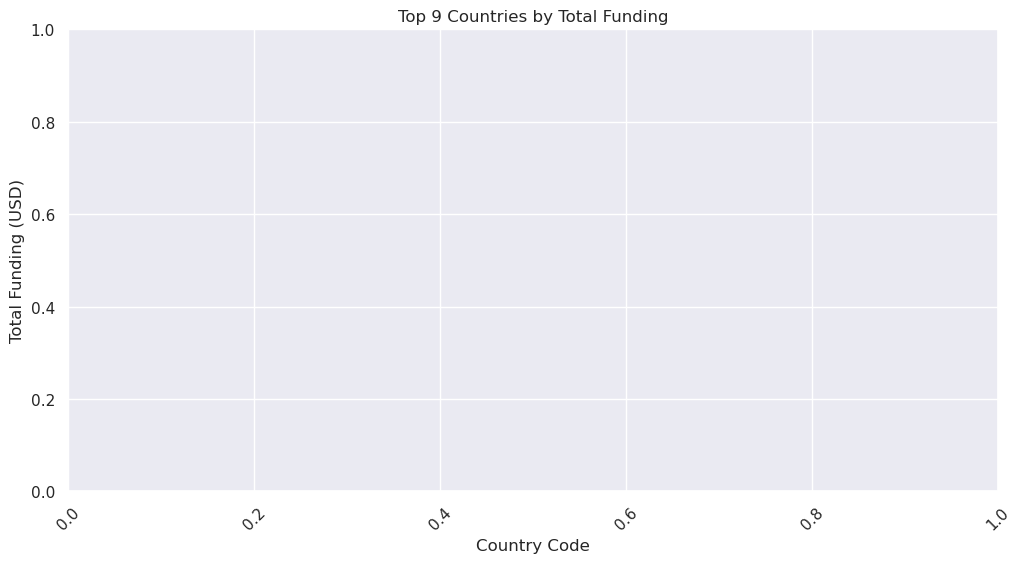

<Figure size 1500x600 with 0 Axes>

/tmp/ipykernel_14418/2995057020.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['funded_at'] = pd.to_datetime(df_filtered['funded_at'], format='%d-%m-%Y')
/tmp/ipykernel_14418/2995057020.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['funded_at'].dt.year


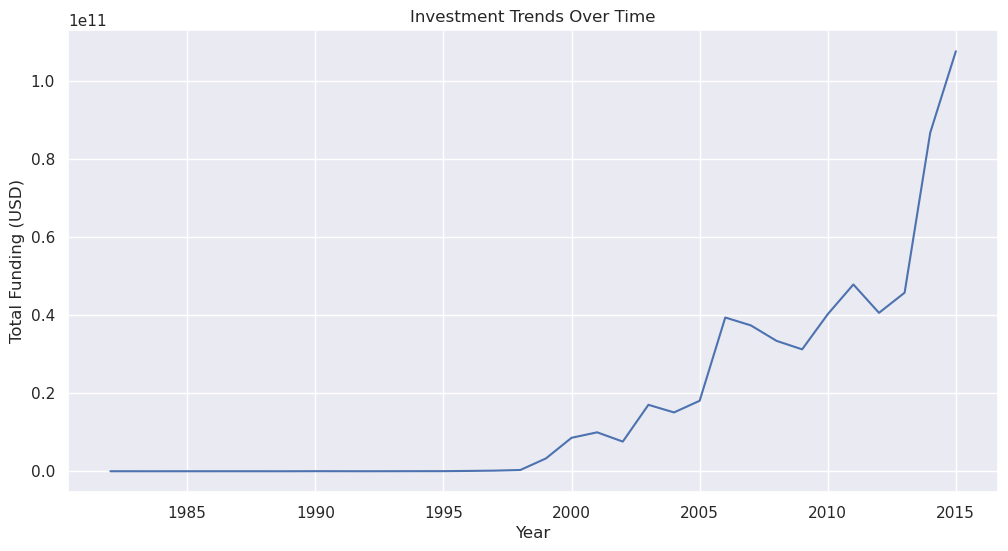

Analysis Complete. Please review the plots and findings above.


In [23]:
# Plot 1: Top 9 Countries by Total Funding
plt.figure(figsize=(12, 6))
sns.barplot(x='country_code', y='raised_amount_usd', data=country_analysis.head(9))
plt.title('Top 9 Countries by Total Funding')
plt.xlabel('Country Code')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.show()

# Explanation for Plot 1:
# - We create a bar plot using Seaborn's barplot function.
# - The x-axis shows the country codes for the top 9 countries.
# - The y-axis shows the total funding amount in USD.
# - We rotate the x-axis labels for better readability.
# This plot provides a quick visual comparison of funding across top countries.

# Plot 2: Top Sectors in Top 3 English-speaking Countries
plt.figure(figsize=(15, 6))
for i, country in enumerate(top_3_countries):
    plt.subplot(1, 3, i+1)
    country_data = sector_analysis[sector_analysis['country_code'] == country].head(5)
    sns.barplot(x='main_sector', y='total_amount', data=country_data)
    plt.title(f'Top Sectors in {country}')
    plt.xlabel('Sector')
    plt.ylabel('Total Funding (USD)')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explanation for Plot 2:
# - We create a subplot for each of the top 3 English-speaking countries.
# - For each country, we show the top 5 sectors by total funding amount.
# - The x-axis shows the main sectors, and the y-axis shows the total funding amount.
# - We use tight_layout() to prevent overlapping of subplots.
# This plot allows for easy comparison of top sectors across the three countries.

# Plot 3: Investment Trends Over Time
df_filtered['funded_at'] = pd.to_datetime(df_filtered['funded_at'], format='%d-%m-%Y')
df_filtered['year'] = df_filtered['funded_at'].dt.year
yearly_trend = df_filtered.groupby('year')['raised_amount_usd'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='raised_amount_usd', data=yearly_trend)
plt.title('Investment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.show()

# Explanation for Plot 3:
# - We first convert the 'funded_at' column to datetime and extract the year.
# - We then group the data by year and sum the total funding for each year.
# - We create a line plot showing the trend of total funding over the years.
# - The x-axis represents years, and the y-axis shows the total funding amount.
# This plot helps visualize the overall trend in investment amounts over time.

print("Analysis Complete. Please review the plots and findings above.")

# Final Explanation:
# These three plots provide a comprehensive visual summary of our analysis:
# 1. We can see which countries are receiving the most funding.
# 2. We can compare the most invested sectors across the top 3 English-speaking countries.
# 3. We can observe how investment trends have changed over time.
# These visualizations will be valuable for presenting the findings to the CEO and making informed investment decisions.